![image info](https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/images/banner_1.png)

# Taller: Redes Neuronales

En este taller podrán poner en práctica sus conocimientos sobre la construcción e implementación de redes neuronales de una capa y multicapa. El taller está constituido por 4 puntos, en los cuales deberan seguir las intrucciones de cada numeral para su desarrollo.

## Datos predicción probabilidad de admisión a la universidad

En este taller se usará el conjunto de datos de admisiones a una universidad proveniente de la base de datos de Kaggle. Cada observación contiene la probabilidad de que un estudiante sea admitido por la universidad, dadas distintas variables predictoras como el puntaje del examén TOEFL y GRE, el promedio (GPA), entre otras. El objetivo es predecir la probabilidad de admissión de cada estudiante. Para más detalles pueden visitar el siguiente enlace: [datos](https://www.kaggle.com/mohansacharya/graduate-admissions).

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [1]:
# Importación librerías
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import tensorflow
import keras
from sklearn.model_selection import train_test_split
from keras import initializers
from keras import optimizers
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.layers import Dropout
from livelossplot import PlotLossesKeras
from sklearn.metrics import mean_squared_error, mean_absolute_error
from keras import backend as K
from sklearn.preprocessing import StandardScaler
from keras.callbacks import EarlyStopping, ModelCheckpoint

In [3]:
# Carga de datos de archivo .csv
data = pd.read_csv('https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/datasets/universityGraduateAdmissions.csv', index_col=0)
data.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
Serial No.,,,,,,,,
1,337,118,4,4.5,4.5,9.65,1,0.92
2,324,107,4,4.0,4.5,8.87,1,0.76
3,316,104,3,3.0,3.5,8.00,1,0.72
4,322,110,3,3.5,2.5,8.67,1,0.80
5,314,103,2,2.0,3.0,8.21,0,0.65


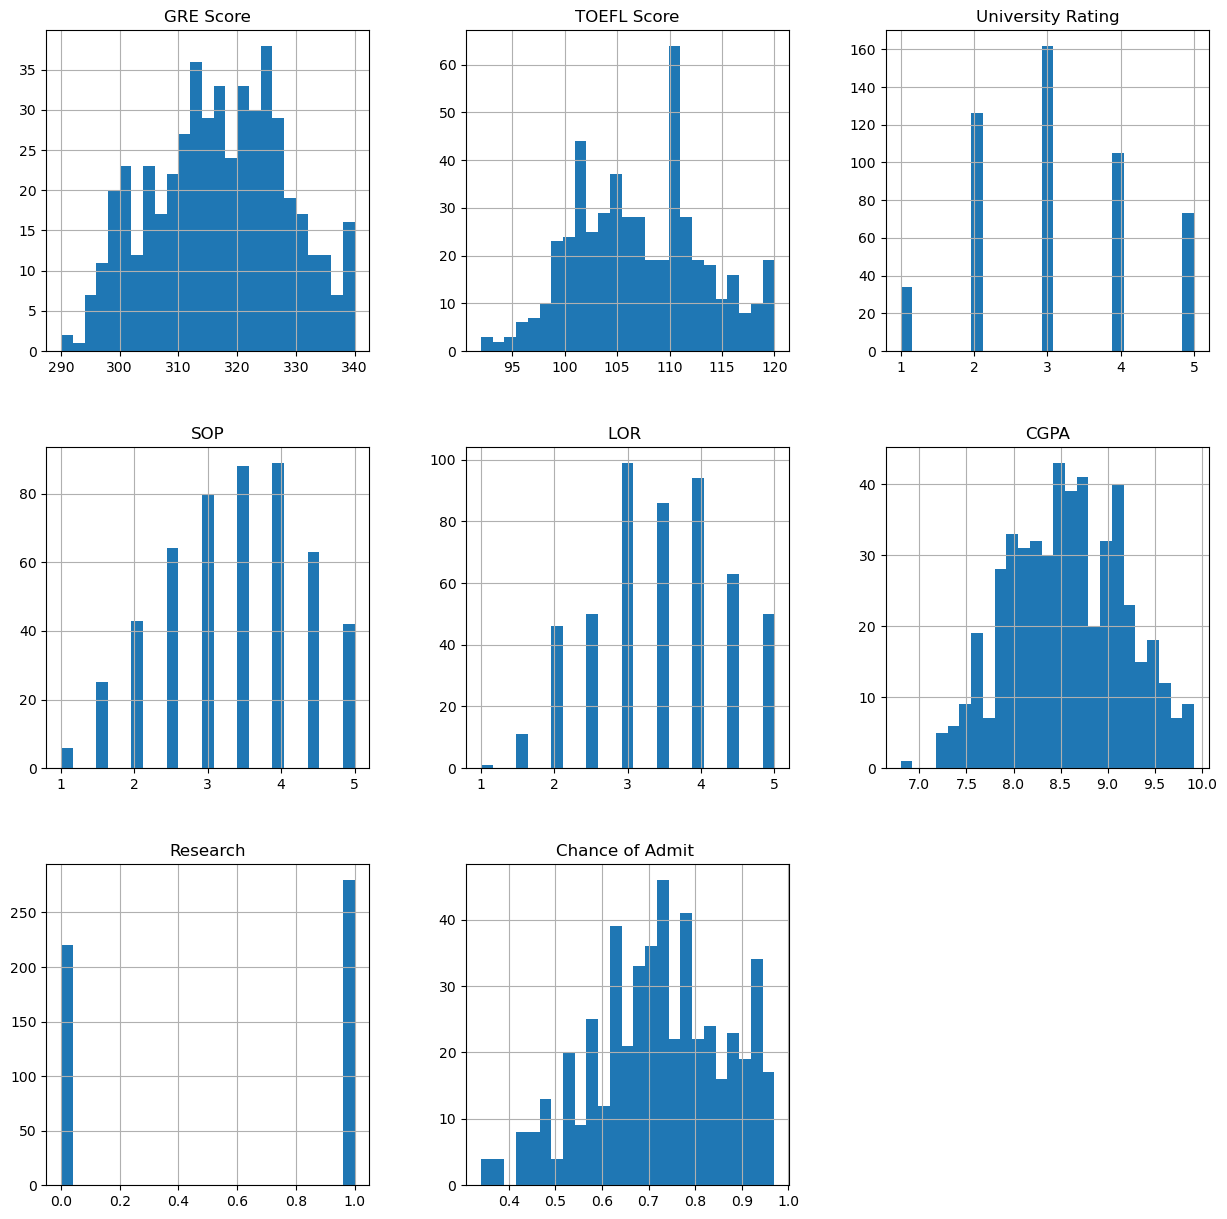

In [4]:
# Histogramas de las varaibles del dataset
data.hist(bins=25, figsize=(15,15))
plt.show()

In [5]:
# Definición de variables predictoras (X)
X = data.drop(data.columns[-1], axis=1)
# Definición de variable de interés (y)
Y = data[data.columns[-1]]

In [6]:
# Separación de variables predictoras (X) y variable de interés (y) en set de entrenamiento y test usandola función train_test_split
xTrain, xTest, yTrain, yTest = train_test_split(X,Y,test_size=0.3, random_state=22)

In [7]:
# Definición de la función StandardScaler
scaler = StandardScaler()
scaler.fit(X)

# Transformación de los set de entrenamiento y test
X_train = pd.DataFrame(data=scaler.transform(xTrain), columns=xTrain.columns, index=xTrain.index)
X_test = pd.DataFrame(data=scaler.transform(xTest), columns=xTest.columns, index=xTest.index)

X_train = np.array(X_train)
Y_train = np.array(yTrain)

X_test = np.array(X_test)
Y_test = np.array(yTest)

In [8]:
# Definición de dimensiones de salida, varaibles de interés
output_var = 1
# Definición de dimensiones de entrada, varaibles predictoras
dims = X_train.shape[1]
print(output_var, ' output variables')
print(dims, 'input variables')

1  output variables
7 input variables


## Punto 1 - Red Neuronal de una capa

En la celda 1 creen una **red neuronal de una capa** con la librería Keras, que prediga la probabilidad de admisión de los estudiantes, usando los sets de entrenamiento y test definidos anteriormente. Pueden usar la función de perdida, el optimizador y el número de épocas que consideren pertinentes para el modelo, justificando su selección. Finalmente, grafiquen la pérdida del modelo vs el número de épocas en el set de entrenamiento y validación, y presenten el desempeño del modelo con las métricas error absoluto medio (MAE) y error cuadrático medio (MSE).

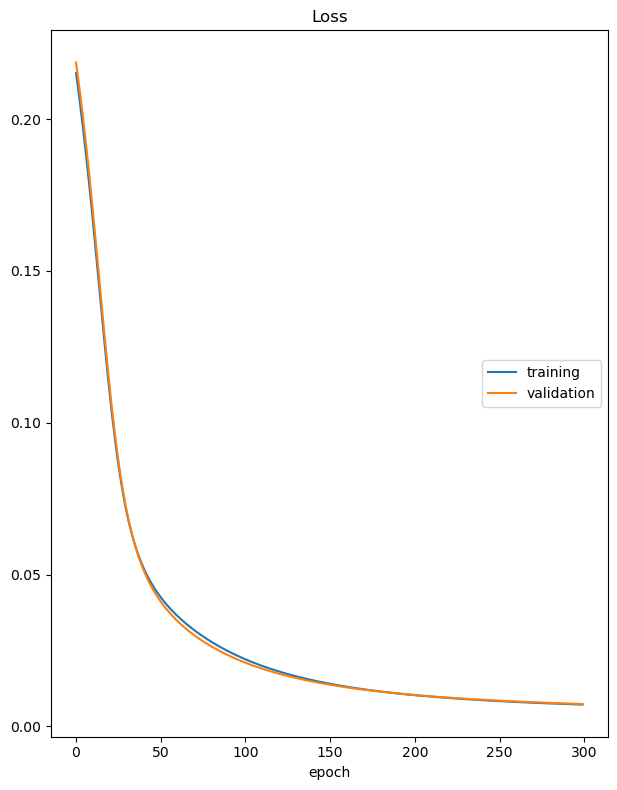

Loss
	training         	 (min:    0.007, max:    0.215, cur:    0.007)
	validation       	 (min:    0.007, max:    0.219, cur:    0.007)
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 56ms/step - loss: 0.0073 - val_loss: 0.0074
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
Mean Absolute Error (MAE): 0.06592054475943247
Mean Squared Error (MSE): 0.007379515861779996


In [9]:
K.clear_session()
model = Sequential()
model.add(Dense(output_var, input_shape=(dims,)))
#Agregamos una funcion de activacion sigmoide para que el resultado sea interpretable como probabilidad
model.add(Activation('sigmoid'))
print(model.summary())
model.compile(optimizer='sgd', loss='mean_squared_error')
model.fit(X_train, Y_train, 
          verbose=1, 
          epochs=300, 
          validation_data=(X_test, Y_test),
          callbacks=[PlotLossesKeras()])

y_pred = model.predict(X_test)
mse = mean_squared_error(Y_test, y_pred)
mae = mean_absolute_error(Y_test, y_pred)
print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)

#### Función de perdida: 
Se usa mean_squared_error dado que es un ejercicio de regresión
#### Optimizador:
Se toma el optimizador "SGD" 
#### Número de épocas:
Se elige la cantidad de epocas (300) teniendo en cuenta el punto en donde convergen el error de entrenamiento y de validación. 
#### Función de activación:
Se utiliza la funcion sigmoide para tener una interpretación más intuitiva obteniendo una salida como una probabilidad.

Como se evidencia en la gráfica la perdida en entrenamiento y validación bajan de forma constante y se estabilizan a aproximadamente alrededor de la epoca 200. La perdida entre entrenamientos es de 0.0073 y la perdida en validación de 0.0074.

## Punto 2 - Red Neuronal multicapa

En la celda 2 creen una **red neuronal con dos capas** con la librería Keras, que prediga la probabilidad de admisión de los estudiantes usando los sets de entrenamiento y test definidos anteriormente. Pueden usar la función de perdida, el optimizador, el número de épocas y el número de neuronas que consideren pertinentes para el modelo, justificando su selección. Finalmente, grafiquen la pérdida del modelo vs el número de épocas en el set de entrenamiento y validación, y presenten el desempeño del modelo con las métricas error absoluto medio (MAE) y error cuadrático medio (MSE).

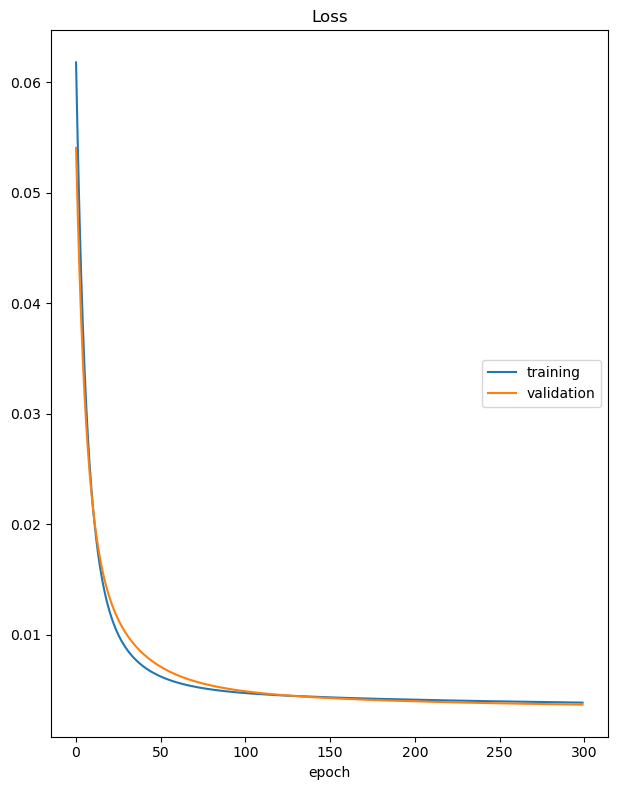

Loss
	training         	 (min:    0.004, max:    0.062, cur:    0.004)
	validation       	 (min:    0.004, max:    0.054, cur:    0.004)
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 55ms/step - loss: 0.0035 - val_loss: 0.0037
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
Mean Absolute Error (MAE): 0.04678965719540914
Mean Squared Error (MSE): 0.003682503702532513


In [16]:
K.clear_session()

model_multi = Sequential()
model_multi.add(Dense(256, input_shape=(dims,),activation='relu'))
model_multi.add(Dense(256,activation='relu'))
model_multi.add(Dense(output_var))

model_multi.add(Activation('sigmoid'))

print(model_multi.summary())

model_multi.compile(optimizer='sgd', loss='mean_squared_error')

model_multi.fit(X_train, Y_train, 
          verbose=1, 
          epochs=300, 
          validation_data=(X_test, Y_test),
          callbacks=[PlotLossesKeras()])

y_pred = model_multi.predict(X_test)
mse_multi = mean_squared_error(Y_test, y_pred)
mae_multi = mean_absolute_error(Y_test, y_pred)
print("Mean Absolute Error (MAE):", mae_multi)
print("Mean Squared Error (MSE):", mse_multi)

#### Función de perdida: 
Se usa mean_squared_error dado que es un ejercicio de regresión
#### Optimizador:
Se toma el optimizador "sgd" 
#### Número de épocas:
Se elige la cantidad de epocas (300) teniendo en cuenta el punto en donde convergen el error de entrenamiento y de validación. 
#### Función de activación:
Se utiliza la funcion sigmoide para tener una interpretación más intuitiva obteniendo una salida como una probabilidad.
#### Número de neuronas:
Se define un modelo multicapa con una capa oculta de 256 neuronas.

Como se evidencia en la gráfica la perdida en entrenamiento y validación bajan de forma constante y se estabilizan a aproximadamente alrededor de la epoca 100. La perdida entre entrenamientos es de 0.0037 y la perdida en validación de 0.0039.

## Punto 3  - Red Neuronal multicapa

En la celda 3 creen **una red neuronal con más de una capa con la librería Keras, usando early stopping y dropout,** que prediga la probabilidad de admisión de los estudiantes con los sets de entrenamiento y test definidos anteriormente. Pueden usar la función de perdida, el optimizador, el número de épocas y el número de neuronas que consideren pertinentes para el modelo, justificando su selección. Finalmente, grafiquen la pérdida del modelo vs el número de épocas en el set de entrenamiento y validación, y presenten el desempeño del modelo con las métricas error absoluto medio (MAE) y error cuadrático medio (MSE).

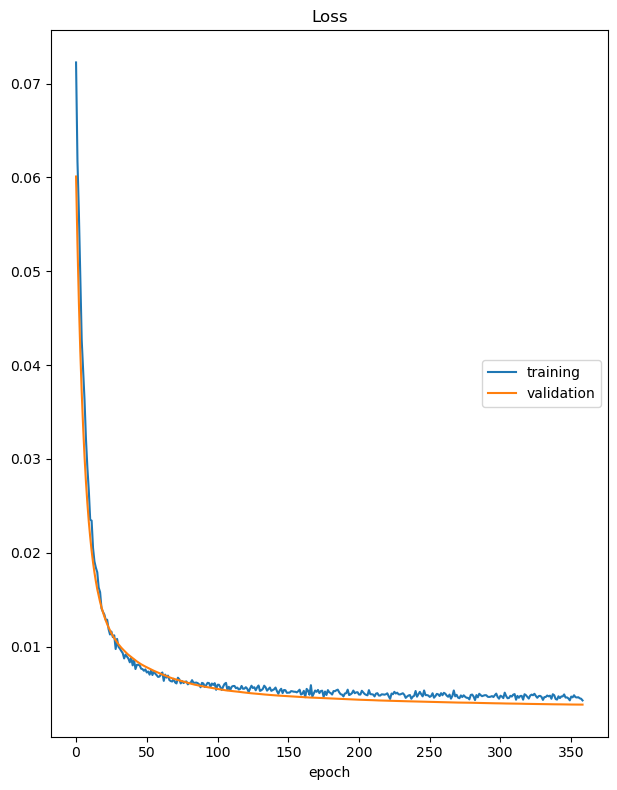

Loss
	training         	 (min:    0.004, max:    0.072, cur:    0.004)
	validation       	 (min:    0.004, max:    0.060, cur:    0.004)
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 56ms/step - loss: 0.0047 - val_loss: 0.0038
Epoch 359: early stopping
1/5 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/stepWARNING:tensorflow:5 out of the last 11 calls to <function TensorFlowTrainer.make_predict_function.<locals>.one_step_on_data_distributed at 0x000001BADF30ACA0> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has reduce_retracing=True option that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/guide/function#controlling_retracing and https://www.tensorflow.org/api_docs/python/tf/function for  more details.

In [14]:
K.clear_session()

model_multi_stop = Sequential()
model_multi_stop.add(Dense(256, input_shape=(dims,),activation='relu'))
model_multi_stop.add(Dropout(0.2)) #Dropuot con tasa del 20%
model_multi_stop.add(Dense(256,activation='relu'))
model_multi_stop.add(Dropout(0.2)) #Dropuot con tasa del 20%
model_multi_stop.add(Dense(output_var))
#Agregamps una funcion de activacion sigmoide para que el resultado sea interpretable como probabilidad
model_multi_stop.add(Activation('sigmoid'))


print(model_multi_stop.summary())

model_multi_stop.compile(optimizer='sgd', loss='mean_squared_error')

# Definición de la función EarlyStopping para considerar durante el entrenamiento
early_stop = EarlyStopping(monitor='val_loss', patience=2, verbose=1) 

# Definición de la función ModelCheckpoint para guardar el modelo con mejor desempeño
fBestModel = 'best_model.keras'
best_model = ModelCheckpoint(fBestModel, verbose=0, save_best_only=True)

model_multi_stop.fit(X_train, Y_train, 
          verbose=1, 
          epochs=500, 
          validation_data=(X_test, Y_test),
          callbacks=[PlotLossesKeras(), best_model, early_stop])

y_pred = model_multi_stop.predict(X_test)
mse_multi_stop = mean_squared_error(Y_test, y_pred)
mae_multi_stop = mean_absolute_error(Y_test, y_pred)
print("Mean Absolute Error (MAE):", mae_multi_stop)
print("Mean Squared Error (MSE):", mse_multi_stop)

#### Función de perdida: 
Se usa mean_squared_error dado que es un ejercicio de regresión
#### Optimizador:
Se toma el optimizador "SGD" 
#### Número de épocas:
Se elige la cantidad de epocas (500) con el objetivo de probar el funcionamiento de la función early stopping con un rango amplio de epocas.
#### Función de activación:
Se utiliza la funcion sigmoide para tener una interpretación más intuitiva obteniendo una salida como una probabilidad.

Como se evidencia en la gráfica la perdida en entrenamiento y validación bajan de forma constante y se estabilizan a aproximadamente alrededor de la epoca 200. La perdida entre entrenamientos es de 0.0047 y la perdida en validación de 0.0038.

## Punto 4 - Comparación y análisis de resultados

En la celda 4 comparen los resultados obtenidos de las diferentes redes y comenten las ventajas del mejor modelo y las desventajas del modelo con el menor desempeño.

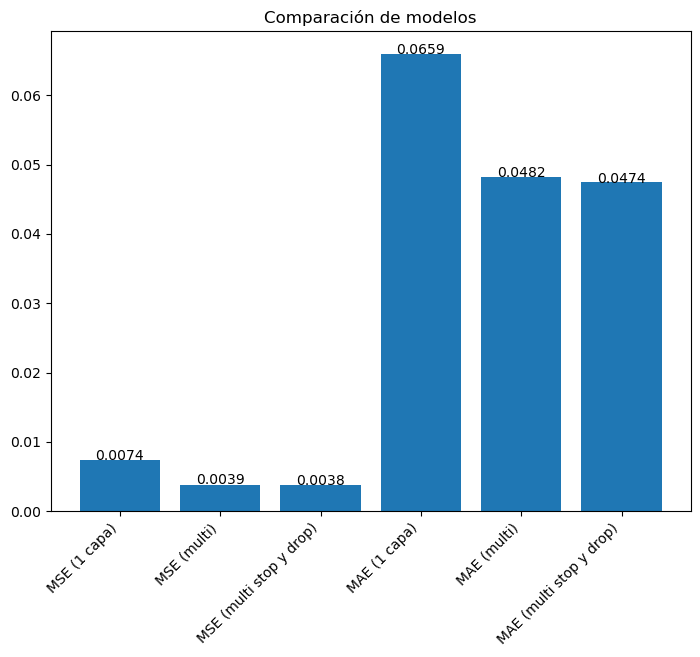

In [15]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.set_title("Comparación de modelos")
ejeX = ['MSE (1 capa)','MSE (multi)' ,'MSE (multi stop y drop)',
        'MAE (1 capa)','MAE (multi)' ,'MAE (multi stop y drop)']
ejeY = [mse, mse_multi, mse_multi_stop, 
        mae, mae_multi, mae_multi_stop]
ejeY_rounded = [round(error, 4) for error in ejeY]
bars = ax.bar(ejeX, ejeY)
plt.xticks(rotation=45, ha='right')
def addlabels(x, y, plotP):
    for i in range(len(x)):
        plotP.text(i, y[i], y[i], ha='center')
addlabels(ejeX, ejeY_rounded, plt)
plt.show()

#### **Ventajas del mejor modelo**<br><br>
- El modelo 3 tiene los valores más bajos para MSE y MAE, lo que nos indica que tiene una mejor capacidad de predicción y generalización en comparación con los otros modelos. 
- El modelo 3 tiene la menor perdida tanto en el conjunto de entrenamiento, como en el de validación. Esto nos indica que tiene un mejor desempeño en terminos de ajuste a los datos y generalización.<br>


#### **Desventajas del modelo con el menor desempeño.**<br>
 - El modelo con menor desempeño fue el modelo 1. La principal desventaja es que al tener la pérdida más alta en entrenamiento u validación, sugiere un ajuste menos preciso a los datos y una menor capacidad de generalización.
 - Otra desventaja es la capacidad de predicción, siendo que el margen de error es mayor que los otros modelos indicados.